In [1]:
import ROOT as r
import numpy as np

Welcome to JupyROOT 6.28/00


In [4]:
f = r.TFile("step3_rechitcut_200to500.root","READ")
tree = f.Get("s")

bk_nHits,bk_res,cg_nHits,cg_res = [],[],[],[]

hadHitE = r.std.vector("float")()
hadHitF = r.std.vector("float")()
HcalRechit_E = r.std.vector("float")()
tree.SetBranchAddress("hadHitE", hadHitE)
tree.SetBranchAddress("hadHitF", hadHitF)
tree.SetBranchAddress("HcalRechit_E", HcalRechit_E)

emHitE = r.std.vector("float")()
emHitF = r.std.vector("float")()
EcalRechit_E = r.std.vector("float")()
tree.SetBranchAddress("emHitE", emHitE)
tree.SetBranchAddress("emHitF", emHitF)
tree.SetBranchAddress("EcalRechit_E", EcalRechit_E)
nHits_hcal = r.TH2F("nHits_hcal","Number of Rechits (200 GeV - 500 GeV);Using dR matching;Using PFElements",100,0,100,100,0,100)
totE_hcal = r.TH2F("totE_hcal","Total Energy of Rechits in HCAL (200 GeV - 500 GeV);Using dR matching;Using PFElements",100,0,1000,100,0,1000)

nHits_ecal = r.TH2F("nHits_ecal","Number of Rechits;Using dR matching (200 GeV - 500 GeV);Using PFElhadents",100,0,40,100,0,40)
totE_ecal = r.TH2F("totE_ecal","Total Energy of Rechits in ECAL (200 GeV - 500 GeV);Using dR matching;Using PFElements",100,0,1000,100,0,1000)

totE = r.TH2F("totE_hcal","Total Energy of Rechits in HCAL+ECAL (200 GeV - 500 GeV);Using dR matching;Using PFElements",100,0,1000,100,0,1000)

totE_corr_pf = r.TH2F("totE_corr_pf","Total Energy of Rechits in HCAL+ECAL (200 GeV - 500 GeV);Corrected PF Candidate energy;Using PFElements",100,0,1000,100,0,1000)
totE_true_pf = r.TH2F("totE_true_pf","Total Energy of Rechits in HCAL+ECAL (200 GeV - 500 GeV);Gen level energy;Using PFElements",100,0,1000,100,0,1000)

totE_raw_pf = r.TH2F("totE_raw_pf","Total Energy of Rechits in HCAL+ECAL (200 GeV - 500 GeV);Raw energy;Using PFElements",100,0,1000,100,0,1000)
totE_raw_pf_ecal = r.TH2F("totE_raw_pf_ecal","Total Energy of Rechits in ECAL (200 GeV - 500 GeV);Raw energy;Using PFElements",100,0,1000,100,0,1000)
totE_raw_pf_hcal = r.TH2F("totE_raw_pf_hcal","Total Energy of Rechits in HCAL (200 GeV - 500 GeV);Raw energy;Using PFElements",100,0,1000,100,0,1000)

totE_raw_pf_1d = r.TH1F("totE_raw_pf_1d","(Energy using PFElements)/(Raw energy) ECAL+HCAL (200 GeV - 500 GeV)",100,0,10)
totE_raw_pf_1d_ecal = r.TH1F("totE_raw_pf_1d_ecal","(Energy using PFElements)/(Raw energy) ECAL (200 GeV - 500 GeV)",100,0,10)
totE_raw_pf_1d_hcal = r.TH1F("totE_raw_pf_1d_hcal","(Energy using PFElements)/(Raw energy) HCAL (200 GeV - 500 GeV)",100,0,10)

resolution_dR = r.TH1F("resol_dR","(Energy using dR - true)/true ECAL+HCAL (200 GeV - 500 GeV)",100,-2,2)
resolution_pf = r.TH1F("resol_pf","(Energy using pf - true)/true ECAL+HCAL (200 GeV - 500 GeV)",100,-2,2)
pftot_1d = r.TH1F("pftot_1d","Energy using pf ECAL+HCAL (200 GeV - 500 GeV)",100,0,10)
totE_true_dR = r.TH2F("totE_true_dR","Total Energy of Rechits in HCAL+ECAL (200 GeV - 500 GeV);Gen level energy;Using dR matching",100,0,1000,100,0,1000)

pftot = np.array([])
trueE = np.array([])
pfc_ar = np.array([])
eta_ar = np.array([])

for entry in tree:
    eta = getattr(tree,"eta")

    p = getattr(tree,"p")
    Ccorrecal = getattr(tree,"Ccorrecal")
    Ccorrhcal = getattr(tree,"Ccorrhcal")
    true = getattr(tree,"true")
    ecalraw = getattr(tree,"ecal")
    hcalraw = getattr(tree,"hcal")
    charge = getattr(tree,"charge")
    pfcid = getattr(tree,"pfcID")
    Eecal = getattr(tree,"Eecal")
    Ehcal = getattr(tree,"Ehcal")
    pfc_ar = np.append(pfc_ar,pfcid.size())
    #if np.all(np.array(hadHitF)<=1) and np.all(np.array(emHitF)<=1):
    pfHits_hcal_E = np.array(hadHitE)*np.array(hadHitF)
    pfHits_ecal_E = np.array(emHitE)*np.array(emHitF)
    hcal = np.array([ np.sum(pfHits_hcal_E), np.sum(list(HcalRechit_E)) ])
    ecal = np.array([np.sum(pfHits_ecal_E) , np.sum(list(EcalRechit_E)) ])
    if hcalraw == 0:
        continue
    if ecalraw == 0:
        continue
    if hcal[0]/hcalraw<1.2 and ecal[0]/ecalraw<1.2 and true>0:
        nHits_hcal.Fill(HcalRechit_E.size(),np.sum(list(hadHitF)))
        #pfHits_ecal_E = pfHits_ecal_E[pfHits_ecal_E>0.1]
        #pfHits_hcal_E = pfHits_hcal_E[pfHits_hcal_E>0.1]
        #hcal = ( np.sum(np.array(hadHitE)), np.sum(list(HcalRechit_E)) )
        totE_hcal.Fill(hcal[1],hcal[0])

        nHits_ecal.Fill(EcalRechit_E.size(),np.sum(list(emHitF)))
        hpluse = hcal+ecal
        #if(hpluse[0]<10):
        #    print("Eta: ",eta,", True: ",true,", Raw:",ecalraw+hcalraw,", PFCID: ",pfcid)
        #    eta_ar = np.append(eta_ar,eta)
        """
        if(hpluse[0]/hpluse[1]>1.5):
            print("------------------------Badmevent----------------------")
            print("Energies in PF Rechits")
            print("HCAL hits:",np.sort(pfHits_hcal_E))
            print("ECAL hits:",np.sort(pfHits_ecal_E))
            print("Sum of PF Rechits", np.sum(pfHits_ecal_E)+np.sum(pfHits_hcal_E))
            print("Energies in DR Rechits")
            print("HCAL hits:",np.sort(np.array(HcalRechit_E)))
            print("ECAL hits:",np.sort(np.array(EcalRechit_E)))
            print("Sum of DR Rechits", np.sum(HcalRechit_E)+np.sum(EcalRechit_E))
            print("True Energy: ",true)
            print()
        """
        #ecal = ( np.sum(np.array(emHitE)), np.sum(list(EcalRechit_E)) )
        totE_ecal.Fill(ecal[1],ecal[0])
        totE.Fill(hcal[1]+ecal[1],hcal[0]+ecal[0])
        totE_corr_pf.Fill(Ccorrecal+Ccorrhcal,hcal[0]+ecal[0])
        totE_true_pf.Fill(true,hcal[0]+ecal[0])
        pftot_1d.Fill(ecal[0]+hcal[0])
        pftot= np.append(pftot,ecal[0]+hcal[0])
        trueE = np.append(trueE,true)

        totE_raw_pf.Fill(ecalraw+hcalraw,hcal[0]+ecal[0])
        totE_raw_pf_ecal.Fill(ecalraw,ecal[0])
        totE_raw_pf_hcal.Fill(hcalraw,hcal[0])
        
        totE_raw_pf_1d.Fill((ecal[0]+hcal[0])/(ecalraw+hcalraw+0.0001))
        totE_raw_pf_1d_ecal.Fill((ecal[0])/(ecalraw+0.0001))
        totE_raw_pf_1d_hcal.Fill((hcal[0])/(hcalraw+0.0001))

        totE_true_dR.Fill(true,hcal[1]+ecal[1])
        
        resolution_dR.Fill((ecal[1]+hcal[1] - true)/(true+0.0001))
        resolution_pf.Fill((ecal[0]+hcal[0] - true)/(true+0.0001))
        #print(np.sum(np.array(hadHitE)*np.array(hadHitF)), np.sum(list(HcalRechit_E))

Warning in <TFile::Append>: Replacing existing TH1: totE_hcal (Potential memory leak).


In [5]:
plotsToDraw=[nHits_ecal,nHits_hcal,totE_ecal,totE_hcal,totE_corr_pf,totE_true_pf,totE_raw_pf,totE_true_dR,totE_raw_pf_ecal,totE_raw_pf_hcal]
folder="diagnosticPlots_encut/"
def drawPlot(plot,plotname="",log=False):
    if(plotname==""):
        plotname=plot.GetName()
    canvas = r.TCanvas("canvas", "2D Histogram Canvas", 800, 800)
    plot.Draw("colz")
    r.gStyle.SetOptStat(111111)
    canvas.SetLeftMargin(0.12)
    if(log):
        canvas.SetLogy()
    file = r.TFile("output.root", "RECREATE")
    file.cd()
    canvas.SetRightMargin(0.1)
    canvas.Update()
    canvas.Draw()
    canvas.Write()
    file.Close()
    canvas.SaveAs(folder+plotname+".png")
    canvas.SaveAs(folder+plotname+".pdf")

for i in plotsToDraw:
    drawPlot(i,i.GetName())
drawPlot(totE,"totE")

Info in <TCanvas::Print>: png file diagnosticPlots_encut/nHits_ecal.png has been created
Info in <TCanvas::Print>: pdf file diagnosticPlots_encut/nHits_ecal.pdf has been created
Info in <TCanvas::Print>: png file diagnosticPlots_encut/nHits_hcal.png has been created
Info in <TCanvas::Print>: pdf file diagnosticPlots_encut/nHits_hcal.pdf has been created
Info in <TCanvas::Print>: png file diagnosticPlots_encut/totE_ecal.png has been created
Info in <TCanvas::Print>: pdf file diagnosticPlots_encut/totE_ecal.pdf has been created
Info in <TCanvas::Print>: png file diagnosticPlots_encut/totE_hcal.png has been created
Info in <TCanvas::Print>: pdf file diagnosticPlots_encut/totE_hcal.pdf has been created
Info in <TCanvas::Print>: png file diagnosticPlots_encut/totE_corr_pf.png has been created
Info in <TCanvas::Print>: pdf file diagnosticPlots_encut/totE_corr_pf.pdf has been created
Info in <TCanvas::Print>: png file diagnosticPlots_encut/totE_true_pf.png has been created
Info in <TCanvas::P

In [6]:
hadRecHitF = r.TH1F("hadRecHitF","RecHit Fraction in HCAL",100,0,1.0001)
emRecHitF = r.TH1F("emRecHitF","RecHit Fraction in ECAL",100,0,1.0001)
for entry in tree:
    for i in hadHitF:
        hadRecHitF.Fill(i)
    for i in emHitF:
        emRecHitF.Fill(i)
drawPlot(hadRecHitF,"hadRecHitF",log=True)
drawPlot(emRecHitF,"emRecHitF",log=True)
drawPlot(totE_raw_pf_1d,log=True)
drawPlot(totE_raw_pf_1d_ecal,log=True)
drawPlot(totE_raw_pf_1d_hcal,log=True)
drawPlot(resolution_pf,log=False)
drawPlot(resolution_dR,log=False)
drawPlot(resolution_pf,"resolution_pf_log",log=True)
drawPlot(resolution_dR,"resolution_dR_log",log=True)

Info in <TCanvas::Print>: png file diagnosticPlots_encut/hadRecHitF.png has been created
Info in <TCanvas::Print>: pdf file diagnosticPlots_encut/hadRecHitF.pdf has been created
Info in <TCanvas::Print>: png file diagnosticPlots_encut/emRecHitF.png has been created
Info in <TCanvas::Print>: pdf file diagnosticPlots_encut/emRecHitF.pdf has been created
Info in <TCanvas::Print>: png file diagnosticPlots_encut/totE_raw_pf_1d.png has been created
Info in <TCanvas::Print>: pdf file diagnosticPlots_encut/totE_raw_pf_1d.pdf has been created
Info in <TCanvas::Print>: png file diagnosticPlots_encut/totE_raw_pf_1d_ecal.png has been created
Info in <TCanvas::Print>: pdf file diagnosticPlots_encut/totE_raw_pf_1d_ecal.pdf has been created
Info in <TCanvas::Print>: png file diagnosticPlots_encut/totE_raw_pf_1d_hcal.png has been created
Info in <TCanvas::Print>: pdf file diagnosticPlots_encut/totE_raw_pf_1d_hcal.pdf has been created
Info in <TCanvas::Print>: png file diagnosticPlots_encut/resol_pf.pn

In [7]:
drawPlot(totE_raw_pf)
drawPlot(pftot_1d)

Info in <TCanvas::Print>: png file diagnosticPlots_encut/totE_raw_pf.png has been created
Info in <TCanvas::Print>: pdf file diagnosticPlots_encut/totE_raw_pf.pdf has been created
Info in <TCanvas::Print>: png file diagnosticPlots_encut/pftot_1d.png has been created
Info in <TCanvas::Print>: pdf file diagnosticPlots_encut/pftot_1d.pdf has been created


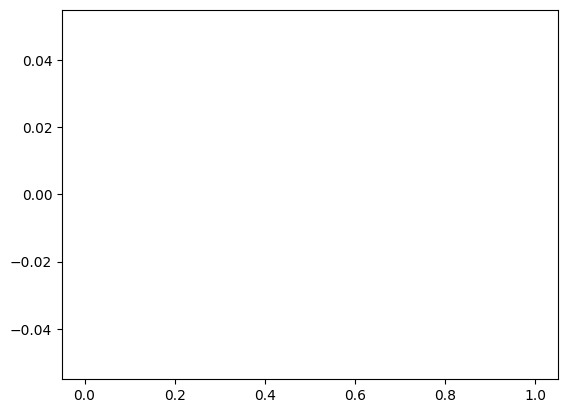

In [ ]:
import matplotlib.pyplot as plt
plt.hist(eta_ar,bins=50)
plt.show()